In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import os
%matplotlib inline
plt.style.use('bmh')

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
labels_names = ['x','square root','plus sign','negative sign',
                'equal','percent','partial','product','pi','summation']

In [4]:
X_train = np.load('data_train.npy')
t_train = np.load('t_train_corrected.npy')

In [5]:
path = Path('Math')  # generate a file name Math that contain images for differnt labels
if not path.exists():
    path.mkdir()
    abs_path=os.getcwd()+'/Math'
    os.chdir(abs_path)
    j=0
    for la in labels_names:
        if not os.path.exists(la):
            os.makedirs(la)
        sample_idx = np.where(t_train==j)[0]
        N = len(sample_idx)
        path=abs_path
        openfile=path+'/'+la+'/'
        os.chdir(openfile)
        for i in range(N):
            name=labels_names[j]+'('+str(j)+'): '+str(sample_idx[i])+'.jpg'
            plt.imsave(name,X_train[:,sample_idx[i]].reshape(300,300), cmap='gray')
        j+=1
        os.chdir(path)

In [6]:
os.chdir('/blue/mingjieliu/jiruijin/fastai/finalproject')

In [7]:
os.getcwd()

'/blue/mingjieliu/jiruijin/fastai/finalproject'

In [8]:
Math = DataBlock(   
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(300),
    batch_tfms=aug_transforms)

In [9]:
dls = Math.dataloaders(path)

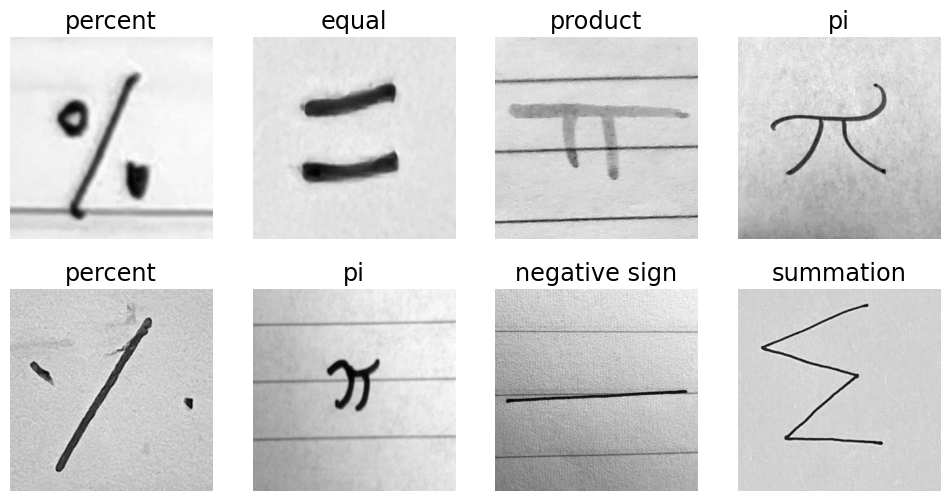

In [10]:
dls.valid.show_batch(max_n=8, nrows=2)

In [11]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

/blue/mingjieliu/jiruijin/program/anaconda3/envs/painting/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/blue/mingjieliu/jiruijin/program/anaconda3/envs/painting/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/jiruijin/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.341756,0.518686,0.157454,44:27


epoch,train_loss,valid_loss,error_rate,time
0,0.391679,0.235904,0.073702,1:05:36
1,0.232597,0.168626,0.052485,1:05:34
2,0.113626,0.180014,0.044109,1:05:23
3,0.042755,0.149530,0.035176,1:05:21
4,0.017066,0.145328,0.030151,1:05:26


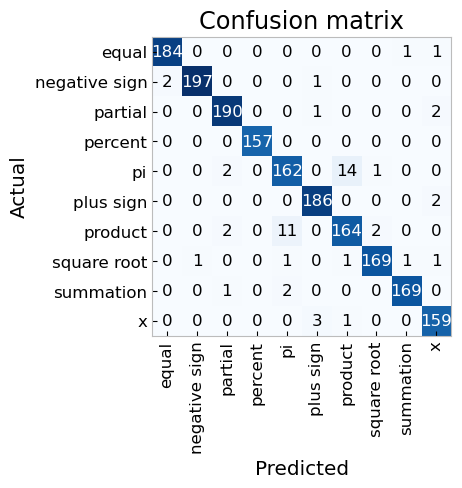

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
learn.export('model_1.pkl')